# Machine Learning II Final Project
# Stage 2: Exploratory Data Analysis

Group Members:
- Daniel Kruk | 20211687
- Marcelo Junior | 20211677

Starting off the notebook like any other, the packages required to write the code will be imported

In [1]:
#This cell contains the packages required
#To run this notebook 

#Packages imported to create visualizations
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt

#Packages utilized to create the map
import plotly.express as px

#Packages utilized to create the Correlation Matrix
import seaborn as sns

#Package utilized to resize the plots
from pylab import rcParams

#To import functions that automate chart creation
from auto_funcs import auto_bar, auto_pie, col_code

Initally the data utilized for the project is imported

In [2]:
#The cell below imports the datasets utilized in the project

#Dataset Importation
path = "C:\\Users\\HP\\OneDrive\\Documents\\College Bizzness\\2nd Semester - 2nd Year\\Machine Learning II\\KeizerKrukis\\Project Data\\"


#Customer Info CSV
customer_info = pd.read_csv(path + "Customer Info PPC.csv", index_col='customer_id')

#Customer Basket CSV
customer_basket = pd.read_csv(path + "Customer Basket Dataset.csv", index_col='customer_id')

#Product Mapping Excel File
product_mapping = pd.read_excel(path + "Product Mapping Excel File.xlsx")

#Supermarket Info
supermarket_info = pd.read_csv(path + "Supermarket Info.csv", index_col='customer_id')

From this point forward, every imported Dataframe will be analysed separately and the default size of every created visualization will be changed for the entire notebook

In [8]:
#Redefining the size of every graphical output
rcParams['figure.figsize'] = 16, 8

#### 1. Analysing the `customer_info` dataframe

In [4]:
#Taking a look at the first and last 5 rows of the dataframe
customer_info

,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,total_minors,total_spending,lifetime_spend_tech
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,0,0,23,0.0,0.0,0.0,2.0,91.0,20.0,...,85.0,0.192154,2017.0,NaN,38.754263,-9.163397,0,0.0,1545.0,125.0
19330,Donald Robertson,0,1,41,1.0,0.0,0.0,2.0,197.0,5958.0,...,85.0,0.098647,2015.0,NaN,38.777761,-9.156197,0,1.0,10219.0,7922.0
2272,Felicia Bradshaw,3,0,36,1.0,1.0,0.0,20.0,397.0,20.0,...,408.0,0.497251,2008.0,NaN,38.785329,-9.127113,0,2.0,1753.0,25.0
25288,Emma Williams,0,0,80,3.0,4.0,1.0,2.0,5282.0,237.0,...,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589,0,7.0,11195.0,1315.0
12829,Hilda Huerta,0,0,23,0.0,0.0,0.0,2.0,82.0,22.0,...,83.0,0.200625,2015.0,NaN,38.756024,-9.162970,0,0.0,1370.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Karen Watts,3,0,48,0.0,0.0,1.0,2.0,209.0,5474.0,...,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911,1,0.0,9730.0,7458.0
26447,Curtis Thompson,0,1,37,0.0,0.0,0.0,3.0,185.0,1066.0,...,22.0,0.118998,2014.0,NaN,38.767070,-9.144301,0,0.0,2416.0,1263.0
182,Richard Carter,0,1,22,0.0,0.0,0.0,2.0,83.0,23.0,...,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140,1,0.0,1491.0,117.0


In [5]:
#Checking the columns' datatypes using .info() method
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29774 entries, 4239 to 2570
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            29774 non-null  object 
 1   highest_education                        29774 non-null  int64  
 2   customer_gender                          29774 non-null  int64  
 3   Age                                      29774 non-null  int64  
 4   kids_home                                29774 non-null  float64
 5   teens_home                               29774 non-null  float64
 6   number_complaints                        29774 non-null  float64
 7   distinct_stores_visited                  29774 non-null  float64
 8   lifetime_spend_groceries                 29774 non-null  float64
 9   lifetime_spend_electronics               29774 non-null  float64
 10  typical_hour                             297

In [9]:
#Quick look at the descriptive statistics using .describe() method
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
highest_education,29774.0,0.767750,1.096294,0.000000,0.000000,0.000000,2.000000,3.000000
customer_gender,29774.0,0.503426,0.499997,0.000000,0.000000,1.000000,1.000000,1.000000
Age,29774.0,51.753711,17.901255,21.000000,36.000000,52.000000,67.000000,83.000000
kids_home,29774.0,1.155404,1.234720,0.000000,0.000000,1.000000,1.000000,10.000000
teens_home,29774.0,0.516827,0.914860,0.000000,0.000000,0.000000,1.000000,9.000000
number_complaints,29774.0,0.770169,0.836844,0.000000,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,29774.0,6.159636,6.520716,0.000000,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,29774.0,4008.813629,5289.228508,0.000000,223.000000,961.000000,5267.000000,18852.000000
lifetime_spend_electronics,29774.0,972.556727,1759.954452,2.000000,46.000000,195.000000,734.750000,6603.000000
typical_hour,29774.0,14.461107,5.509949,0.000000,9.000000,14.000000,20.000000,23.000000


##### 1.1 Analysing the dataset's binary variables
In this section the following variables will be analysed:
- `customer_gender`;
- `has_loyalty_card`;

##### customer_gender

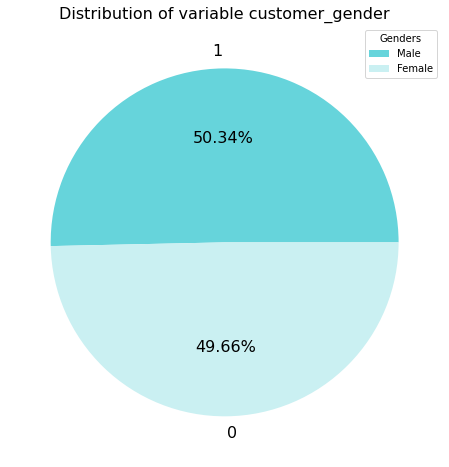

In [10]:
#Checking the distribution of the customers' genders
auto_pie(customer_info['customer_gender'],
              'Distribution of variable customer_gender',
              'Genders',
              'Male',
              'Female')

In [11]:
customer_info['customer_gender'].value_counts()

1    14989
0    14785
Name: customer_gender, dtype: int64

After taking a look at the pie chart above we can clearly notice that there is practically no imbalance whatsoever between the amount of men (14989) and women (14785) that were sampled for the construction of our *`customer_info`* dataset. <br>

##### has_loyalty_card

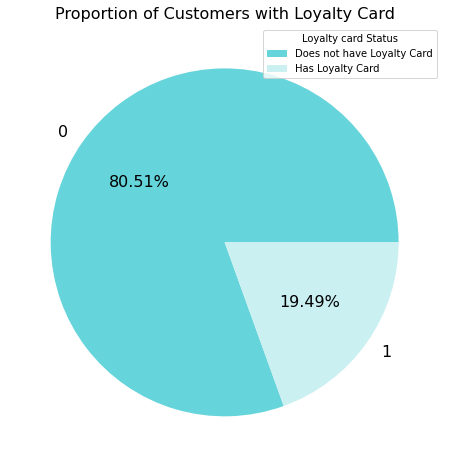

In [12]:
#Checking the porportion of loyalty card owners
auto_pie(customer_info['has_loyalty_card'],
              'Proportion of Customers with Loyalty Card',
              'Loyalty card Status',
              'Does not have Loyalty Card',
              'Has Loyalty Card')

In [13]:
customer_info['has_loyalty_card'].value_counts()

0    23972
1     5802
Name: has_loyalty_card, dtype: int64

Analyzing the pie chart above, we can notice that there is a huge gap between the number of clients that were sampled in terms of having or not a loyalty card, with the majority falling in the category of not having a loyalty card. (23972 do not have loyalty card and 5802 have)

---------------

##### 1.2 Analysing the dataset's numerical (discrete) variables
In this section the following variables will be analysed:
- `year_first_transaction`;
- `Age`;
- `total_minors` (including the specific components `kids_home` and `teens_home`);
- `number_complaints`;
- `distinct_stores_visited`;


##### year_first_transaction

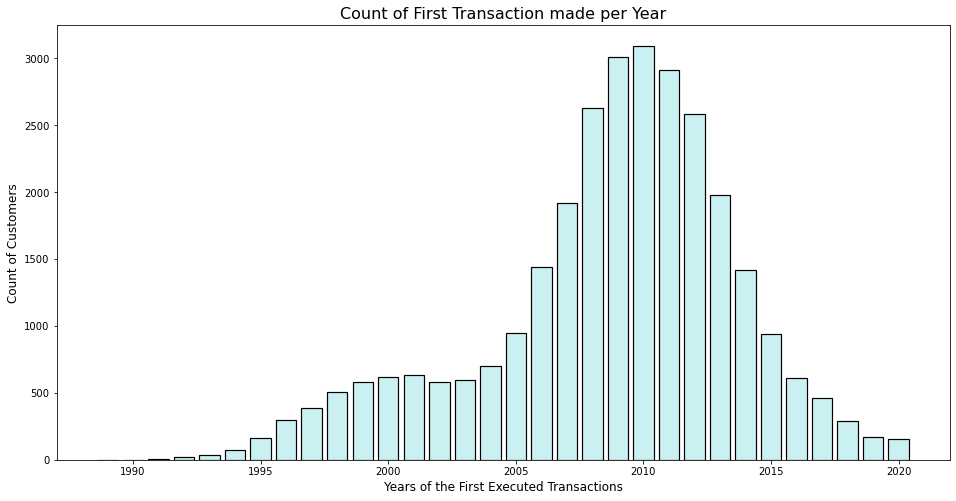

In [14]:
#Checking the distribution of the years in which
#More clients made their first purchases
auto_bar(customer_info['year_first_transaction'], 
          'Count of First Transaction made per Year',
          'Years of the First Executed Transactions',
          'Count of Customers')

This variable was analyzed since in the descriptive statistics our minimum and maximum value were spread apart by quite the ditstance (aproximately 30 years of difference) and also for us to notice/analyze how the number of incoming customers grew up along the years. <br>

Analyzing the histogram itself, we can see that our poll of customers ranges from aproximately 1990 to the year of 2020, with the majority of the customers withdrawn in the poll having made their first purchase in the years surrounding 2010 (2009, 2010 and 2011).<br> 

The distribution of the variable itself is not extremely skewed but one can say it is slightly left skewed.

##### Age

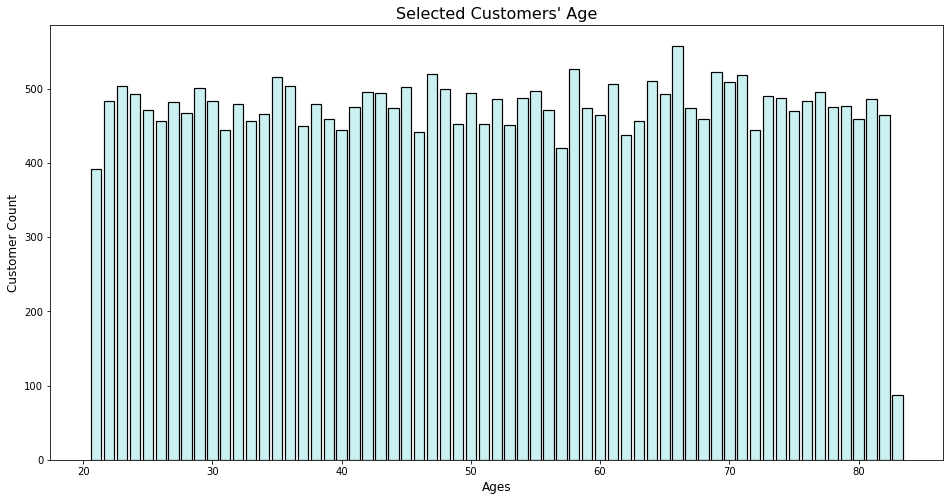

In [15]:
#Checking the distribution of the customers' age
auto_bar(customer_info['Age'], 
          "Selected Customers' Age",
          'Ages',
          'Customer Count')

Looking at the histogram above we can say that the ages of the withdrawn customers in this sample are very well distributed with the graphic not displaying any skewness of any sort. The age of our selected customers ranges evenly from people in their early 20's all the way to people in their mid 80's.

##### total_minors (+ kids_home & teens_home)

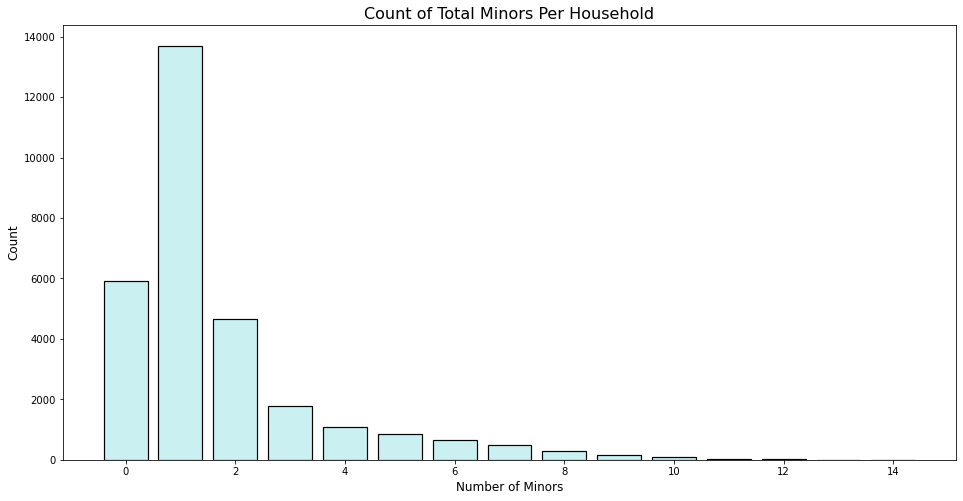

In [16]:
#Checking the distribution of the number of minors
#Per household
auto_bar(customer_info['total_minors'], 
          "Count of Total Minors Per Household",
          'Number of Minors',
          'Count')

From looking at the histogram above, it is clear that the mode of the number of minors per household is between 0 and 1, with a considerable number of households also having 2 minors. Furthermore, it is very clear as well that the distribution of this variable is extremely right skewed. However, it is also curious, that our number of minors per household ranges all the way up to 14 it seems. <br> 

Because certain numbers are outrageous for the total number of minors existing per household, a verification of the variables which led to the creation of this one is going to be made

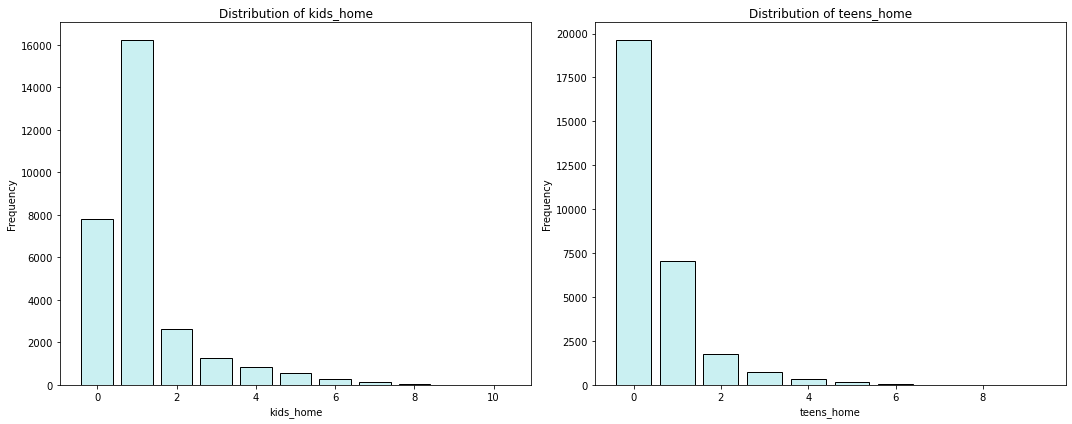

In [17]:
# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the distribution of 'kids_home' as a bar chart
axs[0].bar(customer_info['kids_home'].value_counts().index,
           customer_info['kids_home'].value_counts().values,
           edgecolor='black',
           color='#caf0f2')

axs[0].set_xlabel('kids_home')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of kids_home')

# Plotting the distribution of 'teens_home' as a bar chart
axs[1].bar(customer_info['teens_home'].value_counts().index,
           customer_info['teens_home'].value_counts().values,
           edgecolor='black',
           color='#caf0f2')

axs[1].set_xlabel('teens_home')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of teens_home')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

From looking at the output displayed above, we can see that partially speaking the most common value of kids per household is 1 with the second most common being 0, and that the most common value of teens is 0 with the second being 1. The distribution of both variables, just like the one both generated is extremely right skewed. <br>

We do have some rather "interesting" cases to explore in these graphs, as it is highly unusual for families to so many kids and teens in their housholds. As these cases could be outliers among our data, it's always good to analyze them separately, to see if they are indeed singularities or if they happen to be mistakes. Because analyzing these cases one by one, would be too time-consuming, we will simply take a look at the descriptive statistics of these subsets of observations.


In [19]:
customer_info.describe(percentiles=[0.75,0.90,0.95,0.98,0.99])

,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,total_minors,total_spending,lifetime_spend_tech
count,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,...,29774.000000,29774.000000,29774.000000,5802.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000,29774.000000
mean,0.767750,0.503426,51.753711,1.155404,0.516827,0.770169,6.159636,4008.813629,972.556727,14.461107,...,1132.410761,0.190912,2008.673843,949916.495519,38.747328,-9.158094,0.194868,1.672231,8305.669544,1513.465272
std,1.096294,0.499997,17.901255,1.234720,0.914860,0.836844,6.520716,5289.228508,1759.954452,5.509949,...,1425.973100,0.145950,5.003440,28914.064933,0.022639,0.025525,0.396106,1.837651,6666.356933,2412.316740
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.021920,1989.000000,900039.000000,38.653348,-9.215240,0.000000,0.000000,543.000000,4.000000
50%,0.000000,1.000000,52.000000,1.000000,0.000000,1.000000,3.000000,961.000000,195.000000,14.000000,...,432.000000,0.149596,2009.000000,950213.000000,38.747927,-9.159513,0.000000,1.000000,9135.000000,258.000000
75%,2.000000,1.000000,67.000000,1.000000,1.000000,1.000000,8.000000,5267.000000,734.750000,20.000000,...,1984.000000,0.201142,2012.000000,974949.000000,38.764620,-9.140159,0.000000,2.000000,11107.000000,1303.000000
90%,3.000000,1.000000,76.000000,3.000000,2.000000,2.000000,20.000000,14645.000000,4816.000000,21.000000,...,3842.700000,0.498664,2014.000000,989959.300000,38.777543,-9.123975,1.000000,4.000000,20390.700000,6817.000000
95%,3.000000,1.000000,80.000000,4.000000,2.000000,2.000000,20.000000,15488.000000,5230.000000,22.000000,...,4257.000000,0.502625,2016.000000,994912.900000,38.782283,-9.117210,1.000000,6.000000,21251.000000,7242.000000
98%,3.000000,1.000000,81.000000,5.000000,3.000000,3.000000,20.000000,16157.000000,5565.000000,23.000000,...,4590.000000,0.505882,2018.000000,997867.900000,38.785633,-9.098630,1.000000,8.000000,21947.000000,7581.000000
99%,3.000000,1.000000,82.000000,6.000000,4.000000,3.000000,20.000000,16556.000000,5750.270000,23.000000,...,4789.270000,0.507876,2019.000000,998757.850000,38.786699,-9.097096,1.000000,9.000000,22346.540000,7766.000000


Following the dataframe displayed above, the 99th percentile of the kids_home variable will be verified more closely and the 99th percentile of the teens_home variable will be as well by filtering only for the observations with values above the ones displayed above

In [25]:
#Analyzing the specific cases of possible outliers in the kids_home variable
kids_specific = customer_info[customer_info['kids_home'] > 6]
kids_specific.describe().T

,count,mean,std,min,25%,50%,75%,max
highest_education,176.0,0.960227,1.112838,0.000000,0.000000,0.000000,2.000000,3.000000
customer_gender,176.0,0.465909,0.500260,0.000000,0.000000,0.000000,1.000000,1.000000
Age,176.0,55.437500,16.203935,21.000000,42.000000,56.500000,69.250000,83.000000
kids_home,176.0,7.340909,0.630399,7.000000,7.000000,7.000000,8.000000,10.000000
teens_home,176.0,1.869318,1.406098,0.000000,1.000000,2.000000,3.000000,6.000000
number_complaints,176.0,0.943182,0.232155,0.000000,1.000000,1.000000,1.000000,1.000000
distinct_stores_visited,176.0,3.017045,0.570458,2.000000,3.000000,3.000000,3.000000,4.000000
lifetime_spend_groceries,176.0,5010.698864,207.732507,4398.000000,4876.000000,4997.000000,5152.750000,5588.000000
lifetime_spend_electronics,176.0,201.670455,20.393400,142.000000,190.000000,201.000000,215.250000,250.000000
typical_hour,176.0,17.187500,3.552715,5.000000,15.000000,18.000000,19.000000,23.000000


In [26]:
#Analyzing the specific cases of possible outliers in the teens_home variable
teens_specific = customer_info[customer_info['teens_home'] > 4]
teens_specific.describe().T

,count,mean,std,min,25%,50%,75%,max
highest_education,211.0,1.047393,1.161948,0.000000,0.000000,1.000000,2.000000,3.000000
customer_gender,211.0,0.535545,0.499921,0.000000,0.000000,1.000000,1.000000,1.000000
Age,211.0,54.606635,16.272435,21.000000,43.000000,54.000000,68.500000,82.000000
kids_home,211.0,3.056872,1.798568,0.000000,2.000000,3.000000,4.000000,9.000000
teens_home,211.0,5.431280,0.716318,5.000000,5.000000,5.000000,6.000000,9.000000
number_complaints,211.0,0.938389,0.241020,0.000000,1.000000,1.000000,1.000000,1.000000
distinct_stores_visited,211.0,3.018957,0.534185,2.000000,3.000000,3.000000,3.000000,4.000000
lifetime_spend_groceries,211.0,4981.459716,182.875425,4537.000000,4859.000000,4985.000000,5113.500000,5402.000000
lifetime_spend_electronics,211.0,197.672986,19.379227,149.000000,185.500000,197.000000,211.000000,246.000000
typical_hour,211.0,17.739336,3.467305,6.000000,16.000000,18.000000,20.000000,23.000000


##### number_complaints

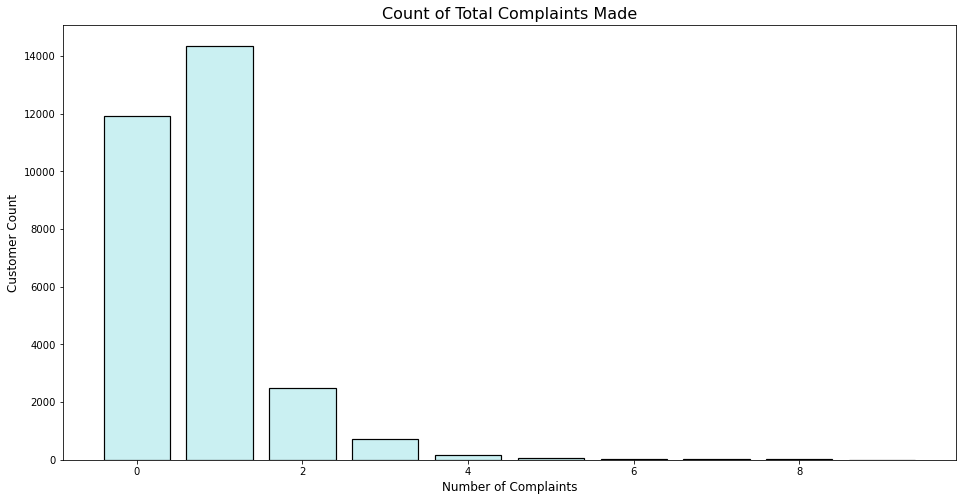

In [27]:
#Cheking the distribution of the number of complaints made
auto_bar(customer_info['number_complaints'], 
          "Count of Total Complaints Made",
          'Number of Complaints',
          'Customer Count')

##### Distribution of all lifetime_spents_(...) per category

In [56]:
lifetime_spend_columns = [col for col in customer_info.columns if col.startswith('lifetime_spend')]

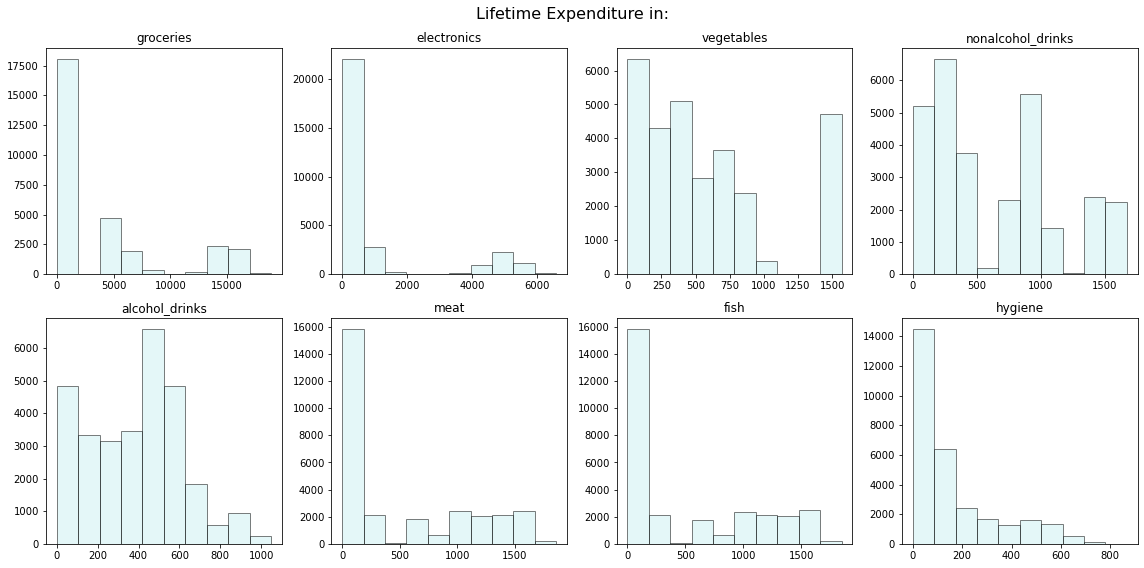

In [58]:
# Create a figure and 3x3 subplots
fig, axs = plt.subplots(2, 4)

# Flatten the subplots array for easier iteration
axs = axs.flatten()

# Create histograms for each subplot
for i, (col, ax) in enumerate(zip(lifetime_spend_columns, axs)):
    # Get the data for the current column
    column_data = customer_info[col]
    
    # Create the histogram
    ax.hist(column_data, bins= None, alpha=0.5, edgecolor='black', color='#caf0f2')
    
    # Set subplot title as column name
    ax.set_title(col[15:])
    
    # Remove the x and y axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

# Add a main title to the plot
fig.suptitle('Lifetime Expenditure in:', fontsize=16)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

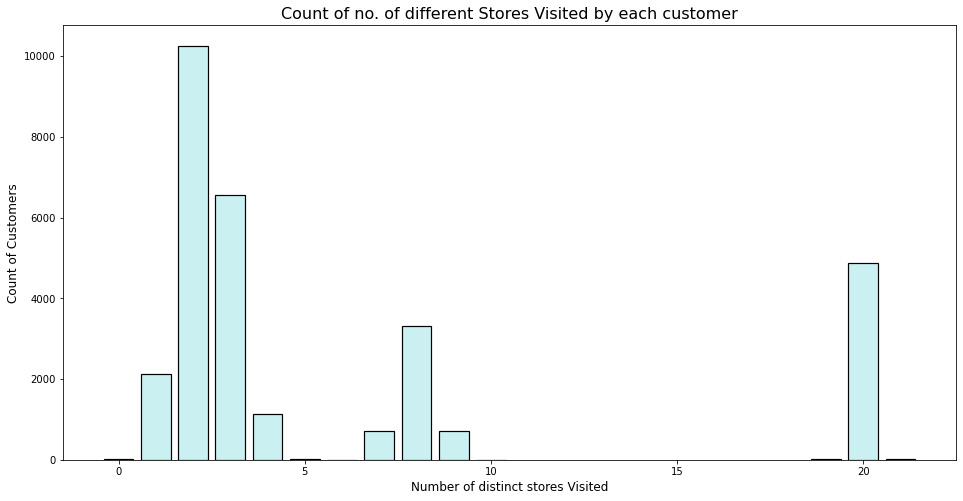

In [28]:
#Checking the distribution of the number of different
#Stores visited by our customers
auto_bar(customer_info['distinct_stores_visited'], 
          'Count of no. of different Stores Visited by each customer',
          'Number of distinct stores Visited',
          'Count of Customers')

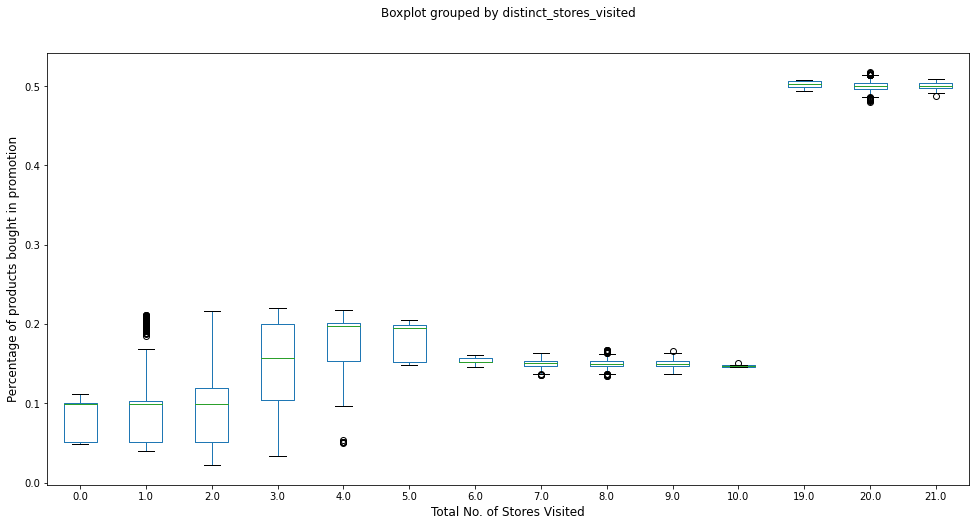

In [29]:
#Creating a boxplot to display the variance of every
#group of customers that visited x-stores

customer_info[['distinct_stores_visited',
               'percentage_of_products_bought_promotion']].boxplot(by='distinct_stores_visited')

plt.grid(visible=None)
plt.title("")
plt.xlabel('Total No. of Stores Visited', fontsize=12) 
plt.ylabel('Percentage of products bought in promotion', fontsize=12)

plt.show()

##### 1.3 Analysing the distribution of categorical variables
In this section the following variables will be analysed:
- `total_spent` per each level of literacy `highest_education`;


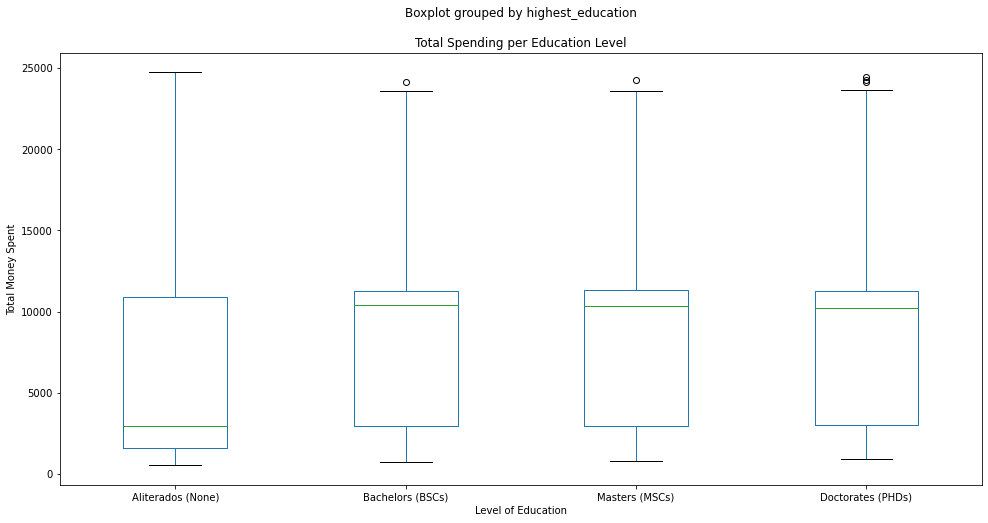

In [31]:
customer_info[['total_spending','highest_education']].boxplot(by='highest_education')
plt.grid(visible=None)
plt.xticks(np.sort(customer_info.highest_education.unique())+1, 
           labels=['Aliterados (None)','Bachelors (BSCs)','Masters (MSCs)','Doctorates (PHDs)'])
plt.title("Total Spending per Education Level")
plt.xlabel('Level of Education') 
plt.ylabel('Total Money Spent')

plt.show()

Comparing the 4 different boxplots we can say there are a few differences between the split statistics regarding the distribution of the total money that each group spent. In terms of the respective maximums and minimums spent per category, we could say that they don't differ much between them - with all maximums being around the 25k mark and all minimums being around the 1k. <br>
Regarding the medians however, there is a clear difference between the one in the boxplot that regards the class that has education 0 (with its value being below the 5k mark) in comparison to all other ones which seem to be around the same value (with this value being around the 10k mark). <br>
It is also curious that as the level of education increases, the number of outliers also increases - with a bigger number of these existing among the Doctorates. <br>
<br>
Further analysis will be taken upon the appearing outliers visible in this plot

In [39]:
#Analyzing the outliers of the Bachelors and Masters categories
total_spent_outliers_v1 = customer_info[(customer_info['total_spending'] > 24000)]
total_spent_outliers_v1

,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,total_minors,total_spending,lifetime_spend_tech
customer_id,,,,,,,,,,,,,,,,,,,,,
28513,Rose Josselyn,0,0,65,1.0,0.0,1.0,7.0,18852.0,199.0,...,3827.0,0.138626,2003.0,NaN,38.716761,-9.163759,0,1.0,24718.0,251.0
22700,Larry Hadlock,0,1,34,1.0,0.0,2.0,8.0,18499.0,208.0,...,3938.0,0.145628,1998.0,NaN,38.724416,-9.157193,0,1.0,24247.0,261.0
3789,Stephen Freeman,3,1,35,1.0,0.0,1.0,8.0,18499.0,206.0,...,4167.0,0.153666,2006.0,994433.0,38.739630,-9.120054,1,1.0,24235.0,252.0
21623,Buddy Chenault,0,1,63,2.0,1.0,1.0,8.0,18789.0,213.0,...,3268.0,0.157723,1996.0,NaN,38.757314,-9.127733,0,3.0,24578.0,267.0
6474,Christopher Meder,3,1,22,1.0,1.0,1.0,9.0,18559.0,218.0,...,3183.0,0.150662,2000.0,950215.0,38.772077,-9.137675,1,2.0,24100.0,265.0
2861,Theresa Kennedy,2,0,53,2.0,0.0,2.0,7.0,18395.0,224.0,...,3917.0,0.147351,2003.0,909583.0,38.756698,-9.147730,1,2.0,24252.0,273.0
25911,William Crom,0,1,75,0.0,0.0,2.0,8.0,18341.0,225.0,...,4411.0,0.149419,1999.0,NaN,38.779886,-9.189391,0,0.0,24052.0,273.0
15014,Clifford Craft,0,1,79,1.0,1.0,0.0,8.0,17662.0,205.0,...,3926.0,0.143972,1997.0,911816.0,38.716212,-9.134144,1,2.0,24066.0,253.0
7492,Phillip Perrier,1,1,48,1.0,1.0,1.0,8.0,18262.0,189.0,...,3729.0,0.148004,2001.0,930919.0,38.741164,-9.160899,1,2.0,24118.0,243.0


Analysing these observations separately, one can state there are no extraordinary differences in any values of any feature. They are indeed outliers in comparison to the other people with the same education level as them, however, they possess no other "singular" characteristic that indicates that we shoudl separate them from the remaining clients.

##### 1.4 Comparing the total money spent per category using a Treemap

Note: in this representation we will simply use the variable lifetime_spend_tech which was created in the Pre-Processing stage by joining the variables lifetime_spend_eletronics and lifetime_spend_videogames instead of using the separated categories

In [33]:
#For starters we will create a dictionary 
#that contains the names of the categories the corresponding
#values of the totals that were spent in each one of them

all_spends = {
    'Groceries': customer_info['lifetime_spend_groceries'].sum(),
    'Vegetables': customer_info['lifetime_spend_vegetables'].sum(),
    'Non-Alcoholic Drinks': customer_info['lifetime_spend_nonalcohol_drinks'].sum(),
    'Alcoholic Drinks': customer_info['lifetime_spend_alcohol_drinks'].sum(),
    'Meat': customer_info['lifetime_spend_meat'].sum(),
    'Fish': customer_info['lifetime_spend_fish'].sum(),
    'Hygiene': customer_info['lifetime_spend_hygiene'].sum(),
    'Tech': customer_info['lifetime_spend_tech'].sum()
}

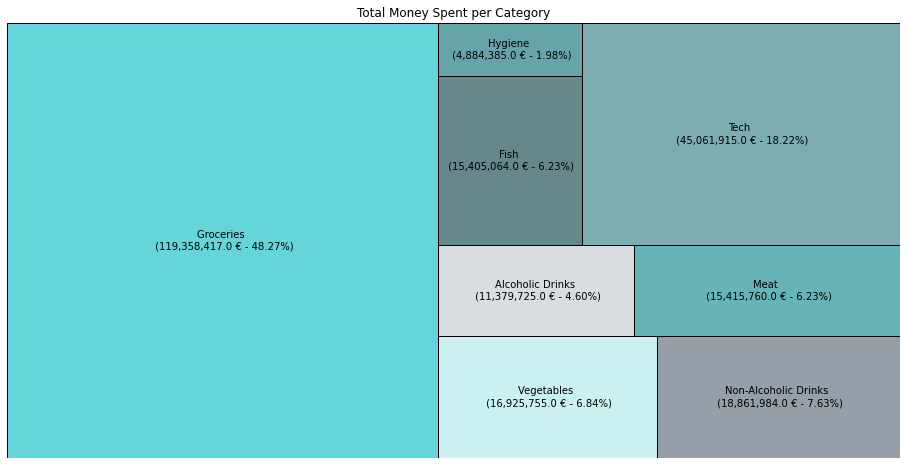

In [34]:
# Now we will plot the treemap using Squarify
squarify.plot(sizes=all_spends.values(), 
              label=[f"{k} \n ({v:,} € - {100*v/sum(all_spends.values()):.2f}%)" 
                     for k, v in all_spends.items()], 
              color=col_code,
              text_kwargs={'fontsize': 10},
              edgecolor='black'  
              )

#Remove the axis
plt.axis('off')
#Add a title
plt.title('Total Money Spent per Category')
#Display the plot
plt.show()

Analyzing the treemap displayed we can immediately notice that the biggest percentage of money that is spent in the company's products is in the *Groceries* category (corresponding to a total of 48.27%), with the second one - and by a considerable gap - being in *Electronics* (corresponding to a total of 11.71%). Generally speaking we can say that the amounts spent per category are fairly balanced excluding the two that were previously mentioned with the values surrounding a 6/7% of the total money that was spent. An interesting fact we can mention, is that the *Hygiene* category corresponds to a very small amount in comparison to every other existing category in the treemap, corresponding only to 2% of the total money that was spent overall.

#### 1.5 Analysing the frequency of visitors per hour using a Line Plot

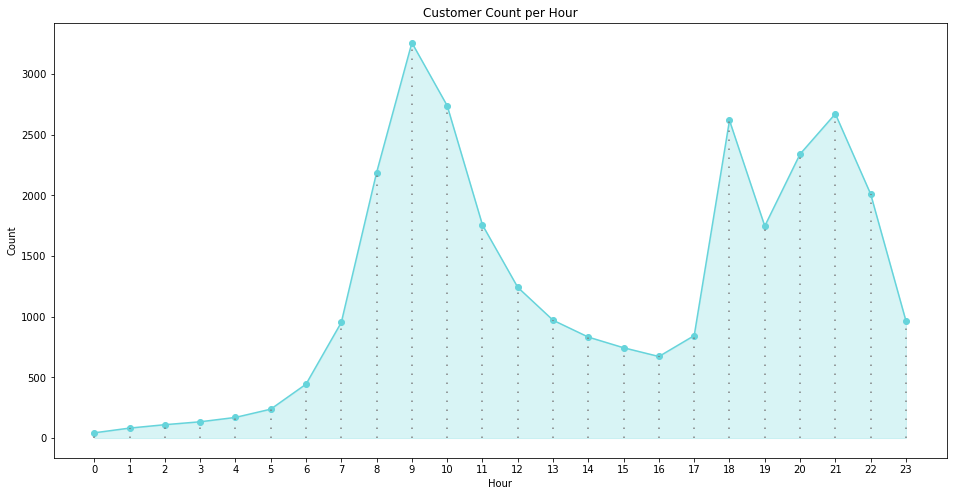

In [46]:
# Plotting the hourly variation of customers
hourly_counts = customer_info.typical_hour.value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#66d4db')

# Filling the bottom part of the graph
plt.fill_between(hourly_counts.index, hourly_counts.values, color='#66d4db', alpha=0.25)

# Adding a title
plt.title('Customer Count per Hour')

# Labeling the axis
plt.xlabel('Hour')
plt.ylabel('Count')

# Adding x-axis labels for each data point
plt.xticks(hourly_counts.index)

# Adjustable dotted line density
dotted_line_density = 5

# Adding dotted lines connecting each data point to the axis
for hour, count in zip(hourly_counts.index, hourly_counts.values):
    plt.plot([hour, hour], [0, count], color='gray', linestyle=(0, (1, dotted_line_density)))

plt.show()


In the displayed graph above, we can see that there is a clear spike in the numbers of the store's visitors around 9:00, 10:00, 18:00 and 21:00 with the biggest number of people (3250 people) visiting our store at around 9:00. Throughout the middle of the day - ranging from 12:00 to 16:00 - we can clearly see a reduction in the number of our visitors (which is compreensible given the majority of the people probably is working during that time of the day)  